In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("E:\\16202\\Loan Dataset\\Personal\\loan_saving_new.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6677 entries, 0 to 6676
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LNACC              6677 non-null   int64  
 1   LNAMOUNT           6677 non-null   float64
 2   LNINTRATE          6677 non-null   float64
 3   LNINSTAMT          6677 non-null   float64
 4   LNPAYFREQ          6677 non-null   int64  
 5   LNEXPDT            6677 non-null   object 
 6   LNODATE            6677 non-null   object 
 7   QSPURPOSEDES       6677 non-null   object 
 8   LNBRNNAME          6677 non-null   object 
 9   LNNIC              6677 non-null   object 
 10  LNRGNNAME          6677 non-null   object 
 11  CIFNO              6677 non-null   object 
 12  QSSECTORDESC       6677 non-null   object 
 13  LNBASELDESC        6677 non-null   object 
 14  YEARS              6677 non-null   object 
 15  MAX_OVERDUE_DAYS   6677 non-null   float64
 16  SEX                6677 

In [4]:
df

,LNACC,LNAMOUNT,LNINTRATE,LNINSTAMT,LNPAYFREQ,LNEXPDT,LNODATE,QSPURPOSEDES,LNBRNNAME,LNNIC,...,MAX_OVERDUE_DAYS,SEX,LOANOPEN_YEAR,AGE,CREDIT_CARD_USED,DEBIT_CARD_USED,RISK_FLAG,QS_SECTOR,LNPERIOD_CATEGORY,AVERAGE_SAGBAL
0,1040103831,600000.00,14.25,14039.0,5,2024-04-28,2018-11-01,CONSTRUCTION,ALUTHKADE,918150897V,...,0.0,F,2018,27.0,No,Yes,0,OTHER SERVICES,MEDIUM-TERM,3.404594e+04
1,1040105118,2000000.00,13.75,46278.0,5,2023-11-30,2018-12-14,PERSONAL NEEDS,ALUTHKADE,811311189V,...,212.0,M,2018,37.0,No,No,1,OTHER SERVICES,MEDIUM-TERM,3.018508e+04
2,1040105163,2000000.00,14.25,46797.0,5,2023-11-28,2018-12-17,CONSTRUCTION,ALUTHKADE,742060268V,...,3.0,M,2018,44.0,No,No,0,OTHER SERVICES,MEDIUM-TERM,1.517327e+04
3,1040105545,600000.00,15.25,14353.0,5,2023-11-27,2018-12-27,CONSTRUCTION,ALUTHKADE,883564200V,...,0.0,M,2018,30.0,Yes,Yes,0,OTHER SERVICES,MEDIUM-TERM,5.064422e+03
4,1040109413,10000000.00,9.25,226800.0,5,2023-10-15,2019-04-16,PURCHASE OF VEHICLE,ALUTHKADE,702071593V,...,16.0,M,2019,49.0,Yes,No,0,MANUFACTURING & LOGISTICS,MEDIUM-TERM,1.118908e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,220040009928,116555.69,12.00,1942.0,5,2029-04-28,2024-05-17,WORKING CAPITAL REQUIREMENT,PASSARA,811940135V,...,0.0,M,2024,43.0,No,No,0,OTHER SERVICES,MEDIUM-TERM,3.002877e+02
6673,701040051882,200000.00,15.00,6934.0,5,2027-07-10,2024-07-30,PERSONAL NEEDS,NAWAM MW-CUS CENT,921082100V,...,0.0,M,2024,32.0,No,Yes,0,CONSUMPTION,MEDIUM-TERM,1.933284e+04
6674,703040037466,2800000.00,15.50,67349.0,5,2029-08-25,2024-08-27,PERSONAL NEEDS,WTC,199108402439,...,6.0,M,2024,33.0,No,No,0,CONSUMPTION,MEDIUM-TERM,4.199749e+03
6675,703040037642,150000.00,12.60,50000.0,5,2024-11-25,2024-09-10,EDUCATION,WTC,972191809V,...,0.0,M,2024,27.0,No,Yes,0,EDUCATION,SHORT-TERM,3.879633e+03


In [5]:
# Impute missing values in 'SAVINGS_BALANCE' with 0
df['AVERAGE_SAGBAL'] = df['AVERAGE_SAGBAL'].fillna(0)

### Drop unwanted columns before model fitting

In [6]:
df=df.drop(['LNACC','LNEXPDT','LNODATE','LNBRNNAME','LNNIC','YEARS','MAX_OVERDUE_DAYS','QSSECTORDESC','CIFNO','LOANOPEN_YEAR'],axis=1)

In [7]:
#Change the data type
df['RISK_FLAG'] = df['RISK_FLAG'].astype('category') 
df['QSPURPOSEDES'] = df['QSPURPOSEDES'].astype('category') 
df['LNRGNNAME'] = df['LNRGNNAME'].astype('category') 
df['QS_SECTOR'] = df['QS_SECTOR'].astype('category') 
df['LNBASELDESC'] = df['LNBASELDESC'].astype('category') 
df['LNPAYFREQ'] = df['LNPAYFREQ'].astype('category') 
df['CREDIT_CARD_USED'] = df['CREDIT_CARD_USED'].astype('category') 
df['DEBIT_CARD_USED'] = df['DEBIT_CARD_USED'].astype('category') 
df['LNPERIOD_CATEGORY'] = df['LNPERIOD_CATEGORY'].astype('category') 
df['SEX'] = df['SEX'].astype('category') 




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6677 entries, 0 to 6676
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   LNAMOUNT           6677 non-null   float64 
 1   LNINTRATE          6677 non-null   float64 
 2   LNINSTAMT          6677 non-null   float64 
 3   LNPAYFREQ          6677 non-null   category
 4   QSPURPOSEDES       6677 non-null   category
 5   LNRGNNAME          6677 non-null   category
 6   LNBASELDESC        6677 non-null   category
 7   SEX                6677 non-null   category
 8   AGE                6677 non-null   float64 
 9   CREDIT_CARD_USED   6677 non-null   category
 10  DEBIT_CARD_USED    6677 non-null   category
 11  RISK_FLAG          6677 non-null   category
 12  QS_SECTOR          6677 non-null   category
 13  LNPERIOD_CATEGORY  6677 non-null   category
 14  AVERAGE_SAGBAL     6677 non-null   float64 
dtypes: category(10), float64(5)
memory usage: 328.2 KB


# Model fitting with SMOTE

# Split dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split

X=df.drop('RISK_FLAG',axis=1)
y=df['RISK_FLAG']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Apply Dummy Encoding for categorical variables

In [10]:
categorical_column=['QSPURPOSEDES','QS_SECTOR','LNBASELDESC','SEX','LNPAYFREQ','CREDIT_CARD_USED','DEBIT_CARD_USED','LNPERIOD_CATEGORY','LNRGNNAME']

#Apply one hot encoding
X_train=pd.get_dummies(X_train,columns=categorical_column,drop_first=True)

print(X_train.head())

       LNAMOUNT  LNINTRATE  LNINSTAMT   AGE  AVERAGE_SAGBAL  \
5432   600000.0      11.25    13121.0  30.0      404.782609   
3806    50000.0      20.00     5470.0  27.0      323.526667   
3388  1100000.0      15.50    21537.0  43.0    22056.276087   
2445   500000.0      11.25    10934.0  39.0        0.000000   
169   3000000.0      10.75   181209.0  60.0    28585.085000   

      QSPURPOSEDES_EDUCATION  QSPURPOSEDES_INVESTMENT  \
5432                   False                    False   
3806                   False                    False   
3388                   False                    False   
2445                   False                    False   
169                    False                    False   

      QSPURPOSEDES_PERSONAL NEEDS  QSPURPOSEDES_PURCHASE OF PROPERTY  \
5432                        False                              False   
3806                         True                              False   
3388                         True                             

In [11]:
X_train.columns

Index(['LNAMOUNT', 'LNINTRATE', 'LNINSTAMT', 'AGE', 'AVERAGE_SAGBAL',
       'QSPURPOSEDES_EDUCATION', 'QSPURPOSEDES_INVESTMENT',
       'QSPURPOSEDES_PERSONAL NEEDS', 'QSPURPOSEDES_PURCHASE OF PROPERTY',
       'QSPURPOSEDES_PURCHASE OF VEHICLE',
       'QSPURPOSEDES_WORKING CAPITAL REQUIREMENT',
       'QS_SECTOR_CONSTRUCTION & INFRASTRUCTURE', 'QS_SECTOR_CONSUMPTION',
       'QS_SECTOR_EDUCATION', 'QS_SECTOR_FINANCIAL', 'QS_SECTOR_HEALTHCARE',
       'QS_SECTOR_MANUFACTURING & LOGISTICS', 'QS_SECTOR_OTHER SERVICES',
       'QS_SECTOR_PROFESSIONAL, SCIENTIFIC & TECHNICAL ACTIV',
       'QS_SECTOR_TECHNOLOGY & INNOVATION', 'QS_SECTOR_TOURISM',
       'QS_SECTOR_TRADERS', 'LNBASELDESC_INDIVIDUALS',
       'LNBASELDESC_MICRO FINANCE', 'LNBASELDESC_MIDDLE MARKET CORPORATES',
       'LNBASELDESC_SME', 'LNBASELDESC_UNCLASSIFIED', 'SEX_M', 'LNPAYFREQ_5',
       'LNPAYFREQ_12', 'CREDIT_CARD_USED_Yes', 'DEBIT_CARD_USED_Yes',
       'LNPERIOD_CATEGORY_MEDIUM-TERM', 'LNPERIOD_CATEGORY_SHORT-TER

In [12]:
#Apply one hot encoding
X_test=pd.get_dummies(X_test,columns=categorical_column,drop_first=True)

print(X_test.head())

        LNAMOUNT  LNINTRATE  LNINSTAMT   AGE  AVERAGE_SAGBAL  \
1575  1100000.00      14.75    26025.0  39.0    98086.344167   
4600    51001.85       6.18     2126.0  34.0    72061.023478   
4590    63848.20       6.18     2661.0  38.0     1626.106087   
2107   272610.13      30.87    30300.0  58.0    18845.843333   
1360    13868.89       6.93     2312.0  39.0    31619.152083   

      QSPURPOSEDES_EDUCATION  QSPURPOSEDES_INVESTMENT  \
1575                   False                    False   
4600                   False                    False   
4590                   False                    False   
2107                   False                    False   
1360                   False                    False   

      QSPURPOSEDES_PERSONAL NEEDS  QSPURPOSEDES_PURCHASE OF PROPERTY  \
1575                         True                              False   
4600                        False                              False   
4590                        False                       

In [13]:
X_train=X_train.applymap(lambda x:1 if x is True else (0 if x is False else x))
X_test=X_test.applymap(lambda x:1 if x is True else (0 if x is False else x))

In [15]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# X_train[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']]=scaler.fit_transform(X_train[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']])
# X_test[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']]=scaler.transform(X_test[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']])


In [14]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

#check the class distribution after SMOTE
print('class distribution before SMOTE:',y_train.value_counts())
print('class distribution after SMOTE:',y_train_smote.value_counts())


class distribution before SMOTE: RISK_FLAG
0    3833
1     840
Name: count, dtype: int64
class distribution after SMOTE: RISK_FLAG
0    3833
1    3833
Name: count, dtype: int64


In [74]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# X_train_smote[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']]=scaler.fit_transform(X_train_smote[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']])
# X_test[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']]=scaler.transform(X_test[['LNAMOUNT','LNINSTAMT','AVERAGE_SAGBAL','AGE','LNINTRATE']])


In [58]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# X_train_smote[['LNAMOUNT','LNINSTAMT','AGE','LNINTRATE']]=scaler.fit_transform(X_train_smote[['LNAMOUNT','LNINSTAMT','AGE','LNINTRATE']])
# X_test[['LNAMOUNT','LNINSTAMT','AGE','LNINTRATE']]=scaler.transform(X_test[['LNAMOUNT','LNINSTAMT','AGE','LNINTRATE']])


In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit & transform training data
X_train_smote[['LNAMOUNT', 'LNINSTAMT', 'AVERAGE_SAGBAL', 'AGE', 'LNINTRATE']] =scaler.fit_transform(X_train_smote[['LNAMOUNT', 'LNINSTAMT', 'AVERAGE_SAGBAL', 'AGE', 'LNINTRATE']])

# Transform test data using the same scaler
X_test[['LNAMOUNT', 'LNINSTAMT', 'AVERAGE_SAGBAL', 'AGE', 'LNINTRATE']] =scaler.transform(X_test[['LNAMOUNT', 'LNINSTAMT', 'AVERAGE_SAGBAL', 'AGE', 'LNINTRATE']])


Training data : 
Training Accuracy: 0.8746412731541873
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3833
           1       0.88      0.87      0.87      3833

    accuracy                           0.87      7666
   macro avg       0.87      0.87      0.87      7666
weighted avg       0.87      0.87      0.87      7666

Testing data : 
Testing Accuracy: 0.8033932135728543
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1654
           1       0.44      0.49      0.46       350

    accuracy                           0.80      2004
   macro avg       0.67      0.68      0.67      2004
weighted avg       0.81      0.80      0.81      2004

Confusion Matrix:
[[1440  214]
 [ 180  170]]


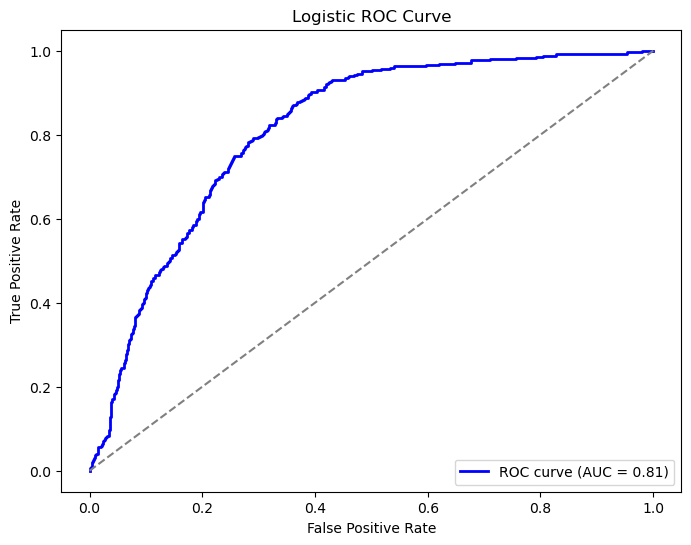

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,roc_auc_score,accuracy_score


model_log=LogisticRegression(random_state=42,max_iter=3000)
model_log.fit(X_train_smote,y_train_smote)

#Evaluate the model

#Accuracy on training data
y_train_pred_log=model_log.predict(X_train_smote)
train_accuracy=accuracy_score(y_train_smote,y_train_pred_log)
print("Training data : ")
print(f'Training Accuracy: {train_accuracy}')
print('Classification Report (Training):')
print(classification_report(y_train_smote, y_train_pred_log))

#Accuracy on testing data
y_test_pred_log=model_log.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_pred_log)
print("Testing data : ")
print(f'Testing Accuracy: {test_accuracy}')
print('Classification Report (Testing):')
print(classification_report(y_test, y_test_pred_log))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_test_pred_log))

#Roc curve
y_prob_log=model_log.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob_log)
roc_auc=roc_auc_score(y_test,y_prob_log)

#plot the Roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC Curve')
plt.legend(loc='lower right')
plt.show()




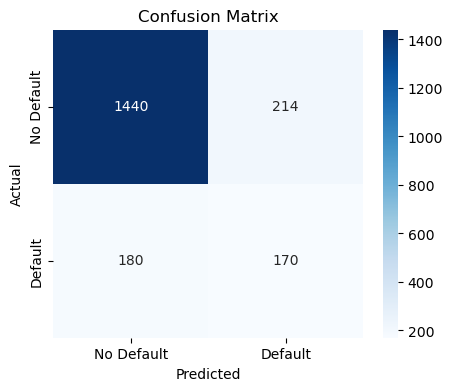

In [17]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Recursive Feature Elimination

Optimal number of features: 42
Selected features: Index(['LNAMOUNT', 'LNINTRATE', 'AGE', 'AVERAGE_SAGBAL',
       'QSPURPOSEDES_EDUCATION', 'QSPURPOSEDES_INVESTMENT',
       'QSPURPOSEDES_PERSONAL NEEDS', 'QSPURPOSEDES_PURCHASE OF PROPERTY',
       'QSPURPOSEDES_PURCHASE OF VEHICLE',
       'QSPURPOSEDES_WORKING CAPITAL REQUIREMENT',
       'QS_SECTOR_CONSTRUCTION & INFRASTRUCTURE', 'QS_SECTOR_CONSUMPTION',
       'QS_SECTOR_EDUCATION', 'QS_SECTOR_FINANCIAL', 'QS_SECTOR_HEALTHCARE',
       'QS_SECTOR_MANUFACTURING & LOGISTICS', 'QS_SECTOR_OTHER SERVICES',
       'QS_SECTOR_PROFESSIONAL, SCIENTIFIC & TECHNICAL ACTIV',
       'QS_SECTOR_TECHNOLOGY & INNOVATION', 'QS_SECTOR_TOURISM',
       'QS_SECTOR_TRADERS', 'LNBASELDESC_INDIVIDUALS',
       'LNBASELDESC_MICRO FINANCE', 'LNBASELDESC_MIDDLE MARKET CORPORATES',
       'LNBASELDESC_SME', 'LNBASELDESC_UNCLASSIFIED', 'SEX_M', 'LNPAYFREQ_12',
       'CREDIT_CARD_USED_Yes', 'DEBIT_CARD_USED_Yes',
       'LNPERIOD_CATEGORY_MEDIUM-TERM', 'LNPER

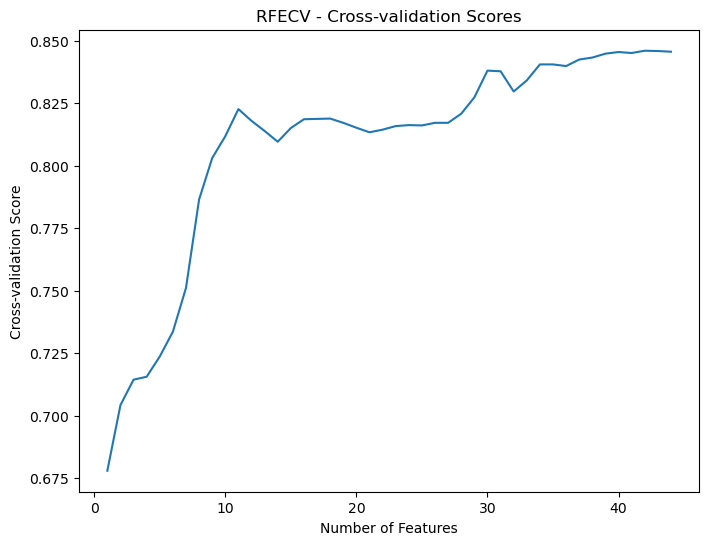

[[1439  215]
 [ 180  170]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1654
           1       0.44      0.49      0.46       350

    accuracy                           0.80      2004
   macro avg       0.67      0.68      0.67      2004
weighted avg       0.81      0.80      0.81      2004



In [18]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the logistic regression model
model_log = LogisticRegression(random_state=42,max_iter=3000)

# Define RFECV with cross-validation
rfecv = RFECV(estimator=model_log, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV on the training data
rfecv.fit(X_train_smote, y_train_smote)

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Print the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features:", selected_features)

# Plot the cross-validation scores vs. the number of features
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation Score")
plt.title("RFECV - Cross-validation Scores")
plt.show()


# Use the optimal features to train the final model
X_train_selected = X_train_smote[selected_features]
model_log.fit(X_train_selected, y_train_smote)

# Evaluate the model
y_test_pred_log = model_log.predict(X_test[selected_features])
print(confusion_matrix(y_test, y_test_pred_log))
print(classification_report(y_test, y_test_pred_log))

# Random Forest

Training data : 
Training Accuracy: 1.0
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3833
           1       1.00      1.00      1.00      3833

    accuracy                           1.00      7666
   macro avg       1.00      1.00      1.00      7666
weighted avg       1.00      1.00      1.00      7666

Testing data : 
Testing Accuracy: 0.844311377245509
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1654
           1       0.55      0.60      0.57       350

    accuracy                           0.84      2004
   macro avg       0.73      0.75      0.74      2004
weighted avg       0.85      0.84      0.85      2004

Confusion Matrix:
[[1482  172]
 [ 140  210]]


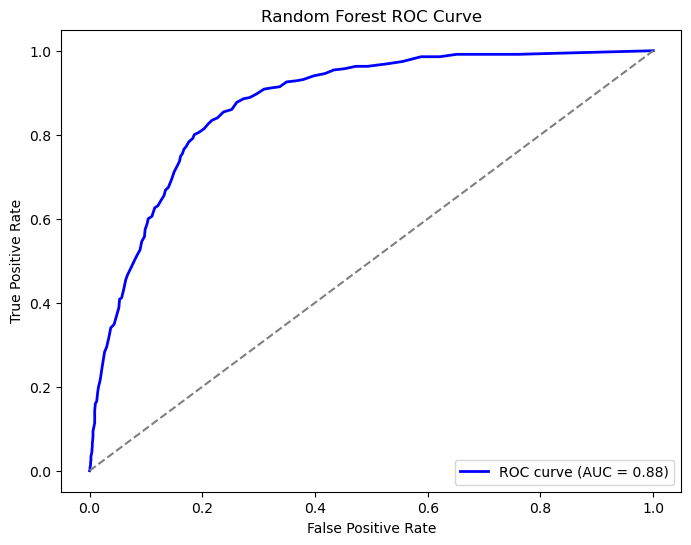

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Accuracy on training data
y_train_pred_rf = rf.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred_rf)
print("Training data : ")
print(f'Training Accuracy: {train_accuracy}')
print('Classification Report (Training):')
print(classification_report(y_train_smote, y_train_pred_rf))

# Accuracy on testing data
y_test_pred_rf = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Testing data : ")
print(f'Testing Accuracy: {test_accuracy}')
print('Classification Report (Testing):')
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rf))

# ROC Curve
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


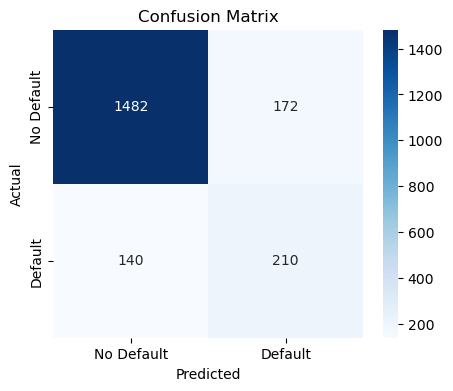

In [20]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Random forest with grid search CV

In [19]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100,200],  # Reduce number of trees if overfitting
#     'max_depth': [10,15],  # Shallower trees to avoid overfitting
#     'min_samples_split': [2,5],  # Increase to reduce overfitting
#     'min_samples_leaf': [1,2],  # Increase to make nodes more generalized
#     'max_features': ['sqrt', 'log2'],  # Feature selection strategy
#     'bootstrap': [True],  # Use bootstrap sampling
#     'criterion': ['entropy']  # Using gini for classification
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# # Fit the model to the data
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best parameters and the best estimator
# print(f"Best Parameters: {grid_search.best_params_}")
# best_model = grid_search.best_estimator_

# # Make predictions using the best model
# y_pred_train = best_model.predict(X_train_smote)
# y_pred_test = best_model.predict(X_test)

# # Calculate training and testing accuracy
# train_accuracy = accuracy_score(y_train_smote, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# # Print the results
# print("Training data : ")
# print(f"Training Accuracy: {train_accuracy}")
# print('Classification Report (Training):')
# print(classification_report(y_train_smote, y_pred_train))

# print("Testing data")
# print(f'Testing Accuracy: {test_accuracy}')
# print('Classification Report (Testing):')
# print(classification_report(y_test, y_pred_test))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_test))

# # ROC-AUC Curve for testing data
# y_prob_test = best_model.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_prob_test)

# # Plot the ROC curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# plt.figure(figsize=(8,6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC Curve')
# plt.legend(loc='lower right')
# plt.show()


In [20]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [300,400],  # Reduce number of trees if overfitting
#     'max_depth': [8,10],  # Shallower trees to avoid overfitting
#     'min_samples_split': [5,10],  # Increase to reduce overfitting
#     'min_samples_leaf': [3,4],  # Increase to make nodes more generalized
#     'max_features': ['sqrt', 'log2'],  # Feature selection strategy
#     'bootstrap': [True],  # Use bootstrap sampling
#     'criterion': ['entropy']  # Using gini for classification
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# # Fit the model to the data
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best parameters and the best estimator
# print(f"Best Parameters: {grid_search.best_params_}")
# best_model = grid_search.best_estimator_

# # Make predictions using the best model
# y_pred_train = best_model.predict(X_train_smote)
# y_pred_test = best_model.predict(X_test)

# # Calculate training and testing accuracy
# train_accuracy = accuracy_score(y_train_smote, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# # Print the results
# print("Training data : ")
# print(f"Training Accuracy: {train_accuracy}")
# print('Classification Report (Training):')
# print(classification_report(y_train_smote, y_pred_train))

# print("Testing data")
# print(f'Testing Accuracy: {test_accuracy}')
# print('Classification Report (Testing):')
# print(classification_report(y_test, y_pred_test))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_test))

# # ROC-AUC Curve for testing data
# y_prob_test = best_model.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_prob_test)

# # Plot the ROC curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# plt.figure(figsize=(8,6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC Curve')
# plt.legend(loc='lower right')
# plt.show()


In [21]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [400,500],  # Reduce number of trees if overfitting
#     'max_depth': [10,15],  # Shallower trees to avoid overfitting
#     'min_samples_split': [5,10],  # Increase to reduce overfitting
#     'min_samples_leaf': [2,4],  # Increase to make nodes more generalized
#     'max_features': ['sqrt', 'log2'],  # Feature selection strategy
#     'bootstrap': [True],  # Use bootstrap sampling
#     'criterion': ['entropy']  # Using gini for classification
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# # Fit the model to the data
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best parameters and the best estimator
# print(f"Best Parameters: {grid_search.best_params_}")
# best_model = grid_search.best_estimator_

# # Make predictions using the best model
# y_pred_train = best_model.predict(X_train_smote)
# y_pred_test = best_model.predict(X_test)

# # Calculate training and testing accuracy
# train_accuracy = accuracy_score(y_train_smote, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# # Print the results
# print("Training data : ")
# print(f"Training Accuracy: {train_accuracy}")
# print('Classification Report (Training):')
# print(classification_report(y_train_smote, y_pred_train))

# print("Testing data")
# print(f'Testing Accuracy: {test_accuracy}')
# print('Classification Report (Testing):')
# print(classification_report(y_test, y_pred_test))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_test))

# # ROC-AUC Curve for testing data
# y_prob_test = best_model.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_prob_test)

# # Plot the ROC curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# plt.figure(figsize=(8,6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC Curve')
# plt.legend(loc='lower right')
# plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=400; total time=   3.3s
[CV] END

[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   4.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   3.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, 

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   3.0s
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 400}
Training data : 
Training Accuracy: 0.894077745890947
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3833
           1       0.86      0.94      0.90      3833

    accuracy                           0.89      7666
   macro avg       0.90      0.89      0.89      7666
weighted avg       0.90      0.89      0.89      7666

Testing data
Testing Accuracy: 0.812874251497006
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1654
           1       0.48      0.77      0.59       350

    accurac

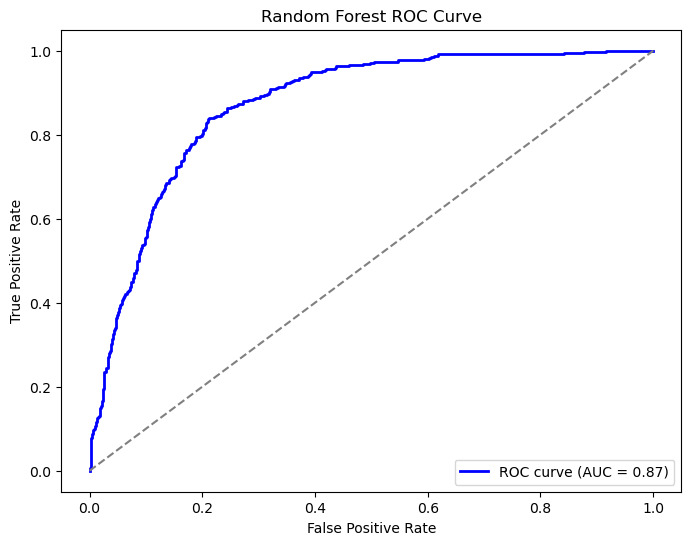

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [300,400],  # Reduce number of trees if overfitting
    'max_depth': [8,10],  # Shallower trees to avoid overfitting
    'min_samples_split': [15,20],  # Increase to reduce overfitting
    'min_samples_leaf': [4,10],  # Increase to make nodes more generalized
    'max_features': ['sqrt', 'log2'],  # Feature selection strategy
    'bootstrap': [True],  # Use bootstrap sampling
    'criterion': ['entropy']  # Using gini for classification ,'gini'
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best estimator
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_train = best_model.predict(X_train_smote)
y_pred_test = best_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the results
print("Training data : ")
print(f"Training Accuracy: {train_accuracy}")
print('Classification Report (Training):')
print(classification_report(y_train_smote, y_pred_train))

print("Testing data")
print(f'Testing Accuracy: {test_accuracy}')
print('Classification Report (Testing):')
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# ROC-AUC Curve for testing data
y_prob_test = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)

# Plot the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Feature selection in Random Forest

# Get important features

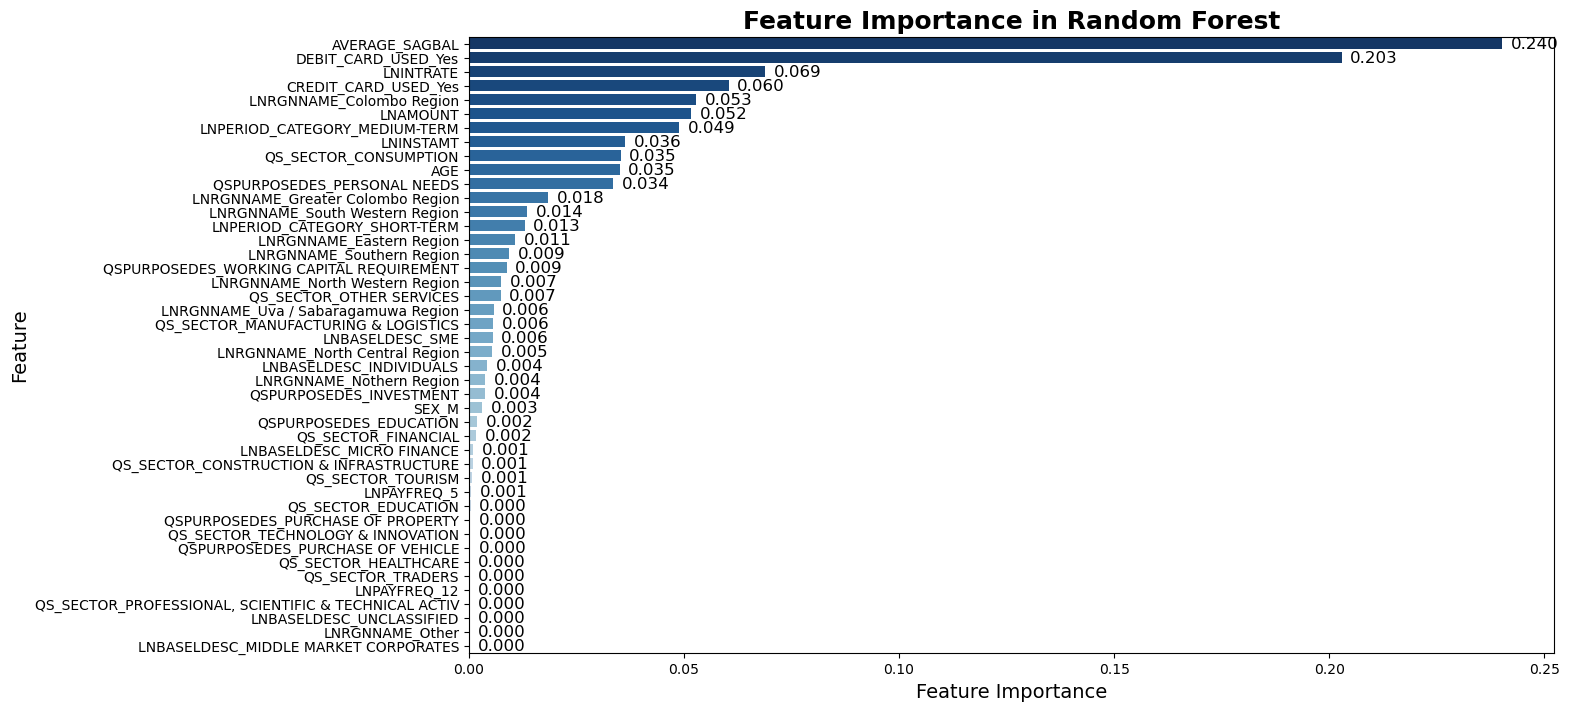

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances from the Random Forest model
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance (Descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')  # Color gradient

# Add title and labels with better styling
plt.title('Feature Importance in Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.002, index, f'{value:.3f}', va='center', fontsize=12)

plt.show()


In [24]:
# Example of re-training with reduced features (if you decided to drop some features)
important_features = importance_df[importance_df['Importance'] > 0.01]['Feature'].tolist()
X_train_reduced = X_train_smote[important_features]
X_test_reduced = X_test[important_features]

# Use the best estimator from previous GridSearchCV (no need to run GridSearchCV again)
best_model.fit(X_train_reduced, y_train_smote)

# Make predictions
y_pred_train_reduced = best_model.predict(X_train_reduced)
y_pred_test_reduced = best_model.predict(X_test_reduced)

# Re-evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f"Training Accuracy (reduced): {accuracy_score(y_train_smote, y_pred_train_reduced)}")
print("Classification Report (reduced):\n", classification_report(y_train_smote, y_pred_train_reduced))

print(f"Testing Accuracy (reduced): {accuracy_score(y_test, y_pred_test_reduced)}")
print("Classification Report (reduced):\n", classification_report(y_test, y_pred_test_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))



Training Accuracy (reduced): 0.8952517610226977
Classification Report (reduced):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      3833
           1       0.87      0.94      0.90      3833

    accuracy                           0.90      7666
   macro avg       0.90      0.90      0.90      7666
weighted avg       0.90      0.90      0.90      7666

Testing Accuracy (reduced): 0.810379241516966
Classification Report (reduced):
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      1654
           1       0.47      0.77      0.59       350

    accuracy                           0.81      2004
   macro avg       0.71      0.79      0.73      2004
weighted avg       0.86      0.81      0.83      2004

Confusion Matrix:
 [[1494  160]
 [ 156  194]]


Training data : 
Training Accuracy: 1.0
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3833
           1       1.00      1.00      1.00      3833

    accuracy                           1.00      7666
   macro avg       1.00      1.00      1.00      7666
weighted avg       1.00      1.00      1.00      7666

Testing data : 
Testing Accuracy: 0.8083832335329342
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1654
           1       0.46      0.57      0.51       350

    accuracy                           0.81      2004
   macro avg       0.68      0.72      0.70      2004
weighted avg       0.83      0.81      0.82      2004

Confusion Matrix:
[[1419  235]
 [ 149  201]]


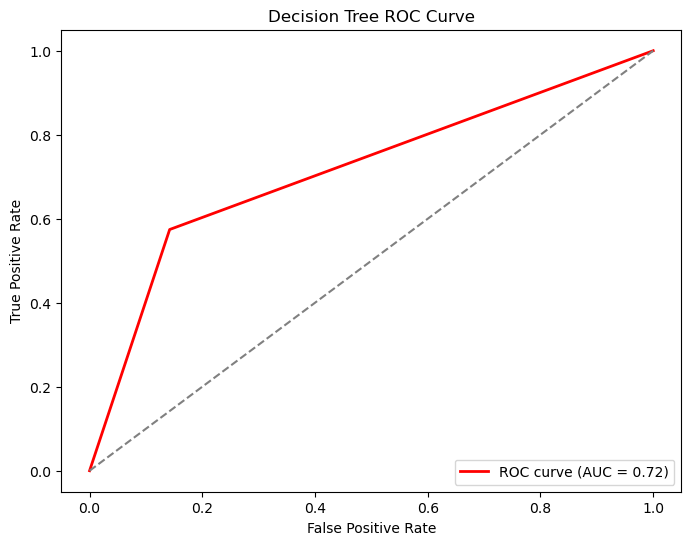

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Accuracy on training data
y_train_pred_dt = dt.predict(X_train_smote)
train_accuracy_dt = accuracy_score(y_train_smote, y_train_pred_dt)
print("Training data : ")
print(f'Training Accuracy: {train_accuracy_dt}')
print('Classification Report (Training):')
print(classification_report(y_train_smote, y_train_pred_dt))

# Accuracy on testing data
y_test_pred_dt = dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("Testing data : ")
print(f'Testing Accuracy: {test_accuracy_dt}')
print('Classification Report (Testing):')
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_dt))

# ROC Curve
y_prob_dt = dt.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()


Training data : 
Training Accuracy: 0.8546830159144273
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.90      0.79      0.85      3833
           1       0.82      0.92      0.86      3833

    accuracy                           0.85      7666
   macro avg       0.86      0.85      0.85      7666
weighted avg       0.86      0.85      0.85      7666

Testing data : 
Testing Accuracy: 0.780938123752495
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1654
           1       0.43      0.76      0.55       350

    accuracy                           0.78      2004
   macro avg       0.68      0.77      0.70      2004
weighted avg       0.85      0.78      0.80      2004

Confusion Matrix:
[[1300  354]
 [  85  265]]


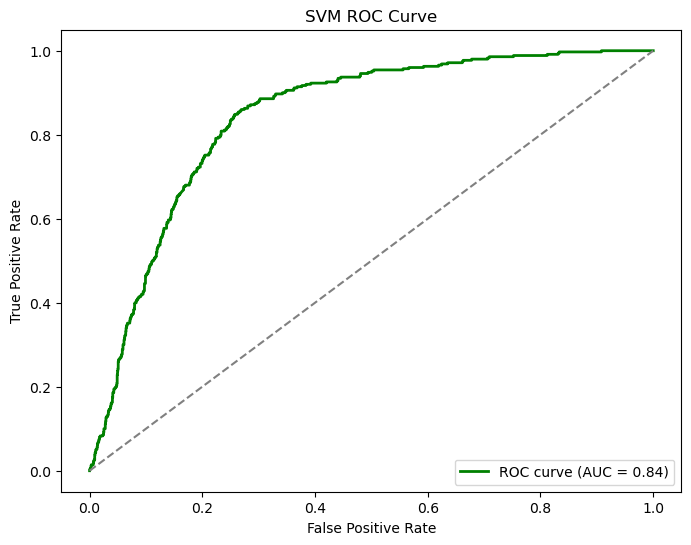

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize SVM classifier with probability estimates enabled
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Accuracy on training data
y_train_pred_svm = svm.predict(X_train_smote)
train_accuracy_svm = accuracy_score(y_train_smote, y_train_pred_svm)
print("Training data : ")
print(f'Training Accuracy: {train_accuracy_svm}')
print('Classification Report (Training):')
print(classification_report(y_train_smote, y_train_pred_svm))

# Accuracy on testing data
y_test_pred_svm = svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Testing data : ")
print(f'Testing Accuracy: {test_accuracy_svm}')
print('Classification Report (Testing):')
print(classification_report(y_test, y_test_pred_svm))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_svm))

# ROC Curve
y_prob_svm = svm.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


# XGBoost

In [25]:
import xgboost as xgb

# Define the model
#xg_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xg_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xg_model.fit(X_train_smote, y_train_smote)

# Make predictions on the training and test data
y_pred_train = xg_model.predict(X_train_smote)
y_pred_test = xg_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the results


print('Training data')
print(f"Training Accuracy: {train_accuracy}")
print("Classification Report training:")
print(classification_report(y_train_smote, y_pred_train))

print('Testing data')
print(f"Testing Accuracy: {test_accuracy}")
# Print the classification report
print("Classification Report testing:")
print(classification_report(y_test, y_pred_test))
# Print the classification report

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training data
Training Accuracy: 0.9816070962692408
Classification Report training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3833
           1       0.98      0.98      0.98      3833

    accuracy                           0.98      7666
   macro avg       0.98      0.98      0.98      7666
weighted avg       0.98      0.98      0.98      7666

Testing data
Testing Accuracy: 0.8423153692614771
Classification Report testing:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1654
           1       0.55      0.55      0.55       350

    accuracy                           0.84      2004
   macro avg       0.73      0.73      0.73      2004
weighted avg       0.84      0.84      0.84      2004

Confusion Matrix:
[[1494  160]
 [ 156  194]]


In [26]:
#Show overfitting so used hyperparameter tuning

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [100,200],  #, 600, 700
    'max_depth': [4,5],  #3,4
    'learning_rate': [0.06,0.07],  #, 0.08, 0.1    0.06,
    'subsample': [0.5, 0.6],  #, 0.7
    'colsample_bytree': [0.5, 0.6],  #, 0.7
}


# GridSearchCV
grid_search = GridSearchCV(estimator=xg_model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

# Fit model to training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred_train = best_xgb.predict(X_train_smote)
y_pred_test = best_xgb.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
print("Classification Report training:\n", classification_report(y_train_smote, y_pred_train))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.06, max_depth=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END c

[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.07, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=5, n_estima

In [84]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV



# param_grid = {
#     'n_estimators': [300,400],  #, 600, 700
#     'max_depth': [2,3],  
#     'learning_rate': [0.05,0.1],  #, 0.08, 0.1    0.06,
#     'subsample': [0.6,0.7],  #, 0.7
#     'colsample_bytree': [0.5, 0.6],  #, 0.7
# }


# # GridSearchCV
# grid_search = GridSearchCV(estimator=xg_model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

# # Fit model to training data
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Best estimator
# best_xgb = grid_search.best_estimator_

# # Make predictions
# y_pred_train = best_xgb.predict(X_train_smote)
# y_pred_test = best_xgb.predict(X_test)

# # Evaluate performance
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
# print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
# print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
# print("Classification Report training:\n", classification_report(y_train_smote, y_pred_train))

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=2, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END c

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=400,

# Important features using GridSearch CV

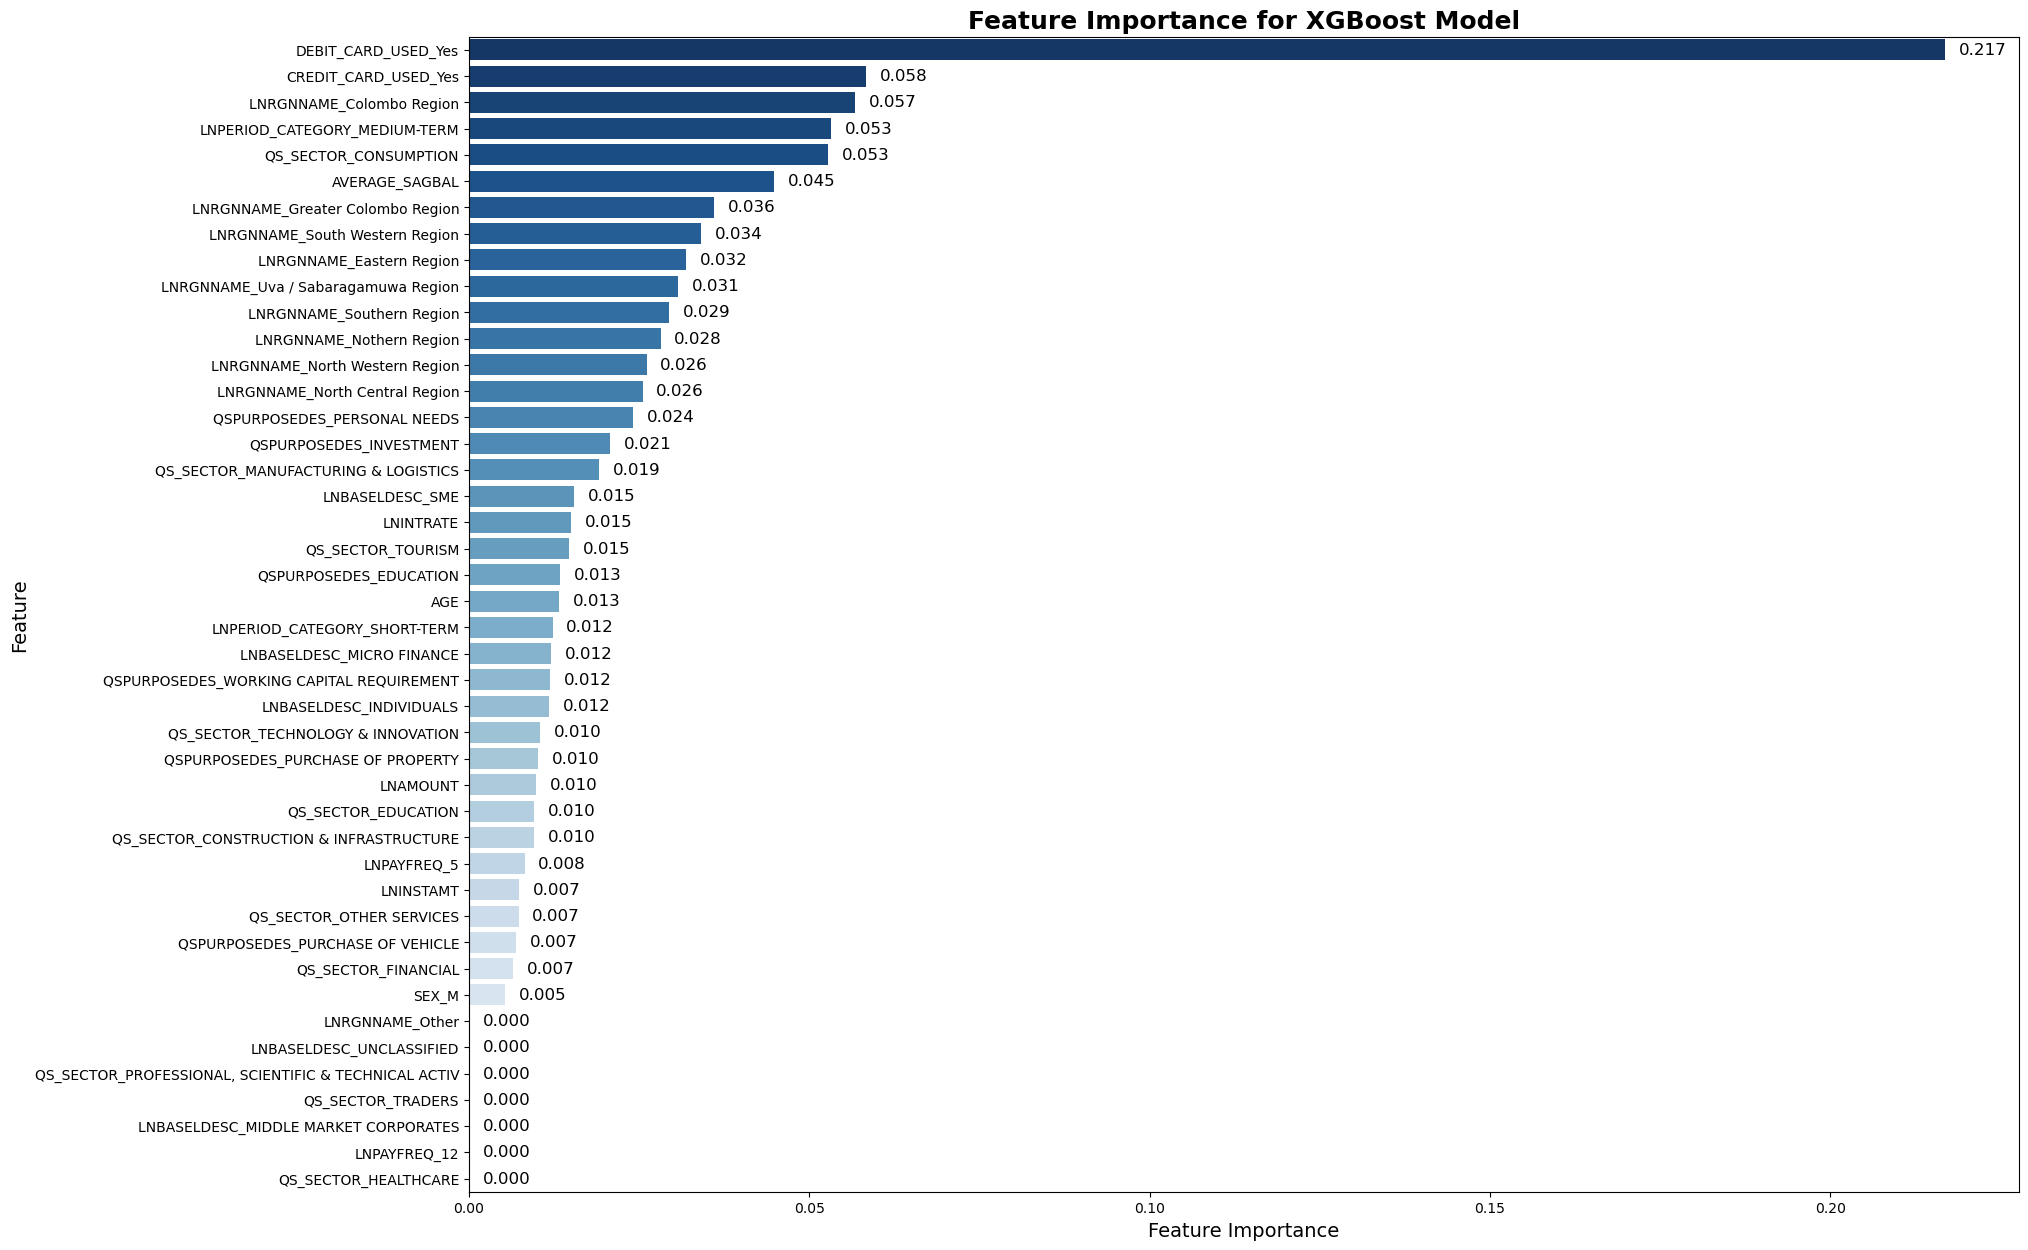

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances from the best model
feature_importances = best_xgb.feature_importances_

# Create a DataFrame for visualization
features = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance (Descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(20, 15))  # Increase figure size
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')  # Color gradient

# Add title and labels with better styling
plt.title('Feature Importance for XGBoost Model', fontsize=18, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.002, index, f'{value:.3f}', va='center', fontsize=12)

plt.show()


In [29]:
# Example of re-training with reduced features (if you decided to drop some features)
important_features = importance_df[importance_df['Importance'] > 0.010]['Feature'].tolist()
X_train_reduced = X_train_smote[important_features]
X_test_reduced = X_test[important_features]

# Use the best estimator from previous GridSearchCV (no need to run GridSearchCV again)
best_xgb.fit(X_train_reduced, y_train_smote)

# Make predictions
y_pred_train_reduced = best_xgb.predict(X_train_reduced)
y_pred_test_reduced = best_xgb.predict(X_test_reduced)

# Re-evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f"Training Accuracy (reduced): {accuracy_score(y_train_smote, y_pred_train_reduced)}")
print("Classification Report (reduced):\n", classification_report(y_train_smote, y_pred_train_reduced))

print(f"Testing Accuracy (reduced): {accuracy_score(y_test, y_pred_test_reduced)}")
print("Classification Report (reduced):\n", classification_report(y_test, y_pred_test_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))



Training Accuracy (reduced): 0.9191234020349596
Classification Report (reduced):
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      3833
           1       0.91      0.94      0.92      3833

    accuracy                           0.92      7666
   macro avg       0.92      0.92      0.92      7666
weighted avg       0.92      0.92      0.92      7666

Testing Accuracy (reduced): 0.8358283433133733
Classification Report (reduced):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1654
           1       0.52      0.65      0.58       350

    accuracy                           0.84      2004
   macro avg       0.72      0.76      0.74      2004
weighted avg       0.85      0.84      0.84      2004

Confusion Matrix:
 [[1454  200]
 [ 120  230]]


# CatBoost

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Define the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 suppresses output during fitting

# Fit the model to training data
catboost_model.fit(X_train_smote, y_train_smote)

# Make predictions on training and testing data
y_pred_train = catboost_model.predict(X_train_smote)
y_pred_test = catboost_model.predict(X_test)

# Evaluate model performance on training and testing data
print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Print the classification report for testing and training
print("Classification Report (Testing):")
print(classification_report(y_test, y_pred_test))

print("Classification Report (Training):")
print(classification_report(y_train_smote, y_pred_train))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.9552569788677276
Testing Accuracy: 0.8483033932135728
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1654
           1       0.56      0.63      0.59       350

    accuracy                           0.85      2004
   macro avg       0.74      0.76      0.75      2004
weighted avg       0.86      0.85      0.85      2004

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3833
           1       0.95      0.96      0.96      3833

    accuracy                           0.96      7666
   macro avg       0.96      0.96      0.96      7666
weighted avg       0.96      0.96      0.96      7666

Confusion Matrix:
[[1479  175]
 [ 129  221]]


# Hyperparameter Tune

In [43]:
param_grid={
    'iterations':[300,400],
    'learning_rate':[0.01,0.02], #0.05,0.02
    'depth':[3,4],
    
}

# GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

# Fit model to training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_catboost = grid_search.best_estimator_

# Make predictions
y_pred_train = best_catboost.predict(X_train_smote)
y_pred_test = best_catboost.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
print("Classification Report training:\n", classification_report(y_train_smote, y_pred_train))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........depth=3, iterations=300, learning_rate=0.01; total time=   0.8s
[CV] END ........depth=3, iterations=300, learning_rate=0.01; total time=   0.9s
[CV] END ........depth=3, iterations=300, learning_rate=0.01; total time=   1.1s
[CV] END ........depth=3, iterations=300, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=3, iterations=300, learning_rate=0.01; total time=   0.9s
[CV] END ........depth=3, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=3, iterations=300, learning_rate=0.02; total time=   0.9s
[CV] END ........depth=3, iterations=300, learning_rate=0.02; total time=   0.9s
[CV] END ........depth=3, iterations=300, learning_rate=0.02; total time=   0.8s
[CV] END ........depth=3, iterations=300, learning_rate=0.02; total time=   1.1s
[CV] END ........depth=3, iterations=400, learning_rate=0.01; total time=   1.5s
[CV] END ........depth=3, iterations=400, learnin

In [77]:
# param_grid={
#     'iterations':[300,400],
#     'learning_rate':[0.01,0.02], #0.05,0.02
#     'depth':[5,6],
    
# }

# # GridSearchCV
# grid_search = GridSearchCV(estimator=catboost_model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

# # Fit model to training data
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Best model
# best_catboost = grid_search.best_estimator_

# # Make predictions
# y_pred_train = best_catboost.predict(X_train_smote)
# y_pred_test = best_catboost.predict(X_test)

# # Evaluate performance
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
# print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
# print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
# print("Classification Report training:\n", classification_report(y_train_smote, y_pred_train))

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........depth=5, iterations=300, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=5, iterations=300, learning_rate=0.01; total time=   1.3s
[CV] END ........depth=5, iterations=300, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=5, iterations=300, learning_rate=0.01; total time=   1.1s
[CV] END ........depth=5, iterations=300, learning_rate=0.01; total time=   1.2s
[CV] END ........depth=5, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=5, iterations=300, learning_rate=0.02; total time=   1.2s
[CV] END ........depth=5, iterations=300, learning_rate=0.02; total time=   1.1s
[CV] END ........depth=5, iterations=300, learning_rate=0.02; total time=   1.1s
[CV] END ........depth=5, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=5, iterations=400, learning_rate=0.01; total time=   1.5s
[CV] END ........depth=5, iterations=400, learnin

In [78]:
# param_grid={
#     'iterations':[300,400],
#     'learning_rate':[0.01,0.02], #0.05,0.02
#     'depth':[4,5],
    
# }

# # GridSearchCV
# grid_search = GridSearchCV(estimator=catboost_model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

# # Fit model to training data
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Best model
# best_catboost = grid_search.best_estimator_

# # Make predictions
# y_pred_train = best_catboost.predict(X_train_smote)
# y_pred_test = best_catboost.predict(X_test)

# # Evaluate performance
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
# print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
# print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
# print("Classification Report training:\n", classification_report(y_train_smote, y_pred_train))

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........depth=4, iterations=300, learning_rate=0.01; total time=   1.1s
[CV] END ........depth=4, iterations=300, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=4, iterations=300, learning_rate=0.01; total time=   1.0s
[CV] END ........depth=4, iterations=300, learning_rate=0.01; total time=   1.1s
[CV] END ........depth=4, iterations=300, learning_rate=0.01; total time=   1.1s
[CV] END ........depth=4, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=4, iterations=300, learning_rate=0.02; total time=   0.9s
[CV] END ........depth=4, iterations=300, learning_rate=0.02; total time=   0.9s
[CV] END ........depth=4, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=4, iterations=300, learning_rate=0.02; total time=   1.0s
[CV] END ........depth=4, iterations=400, learning_rate=0.01; total time=   1.2s
[CV] END ........depth=4, iterations=400, learnin

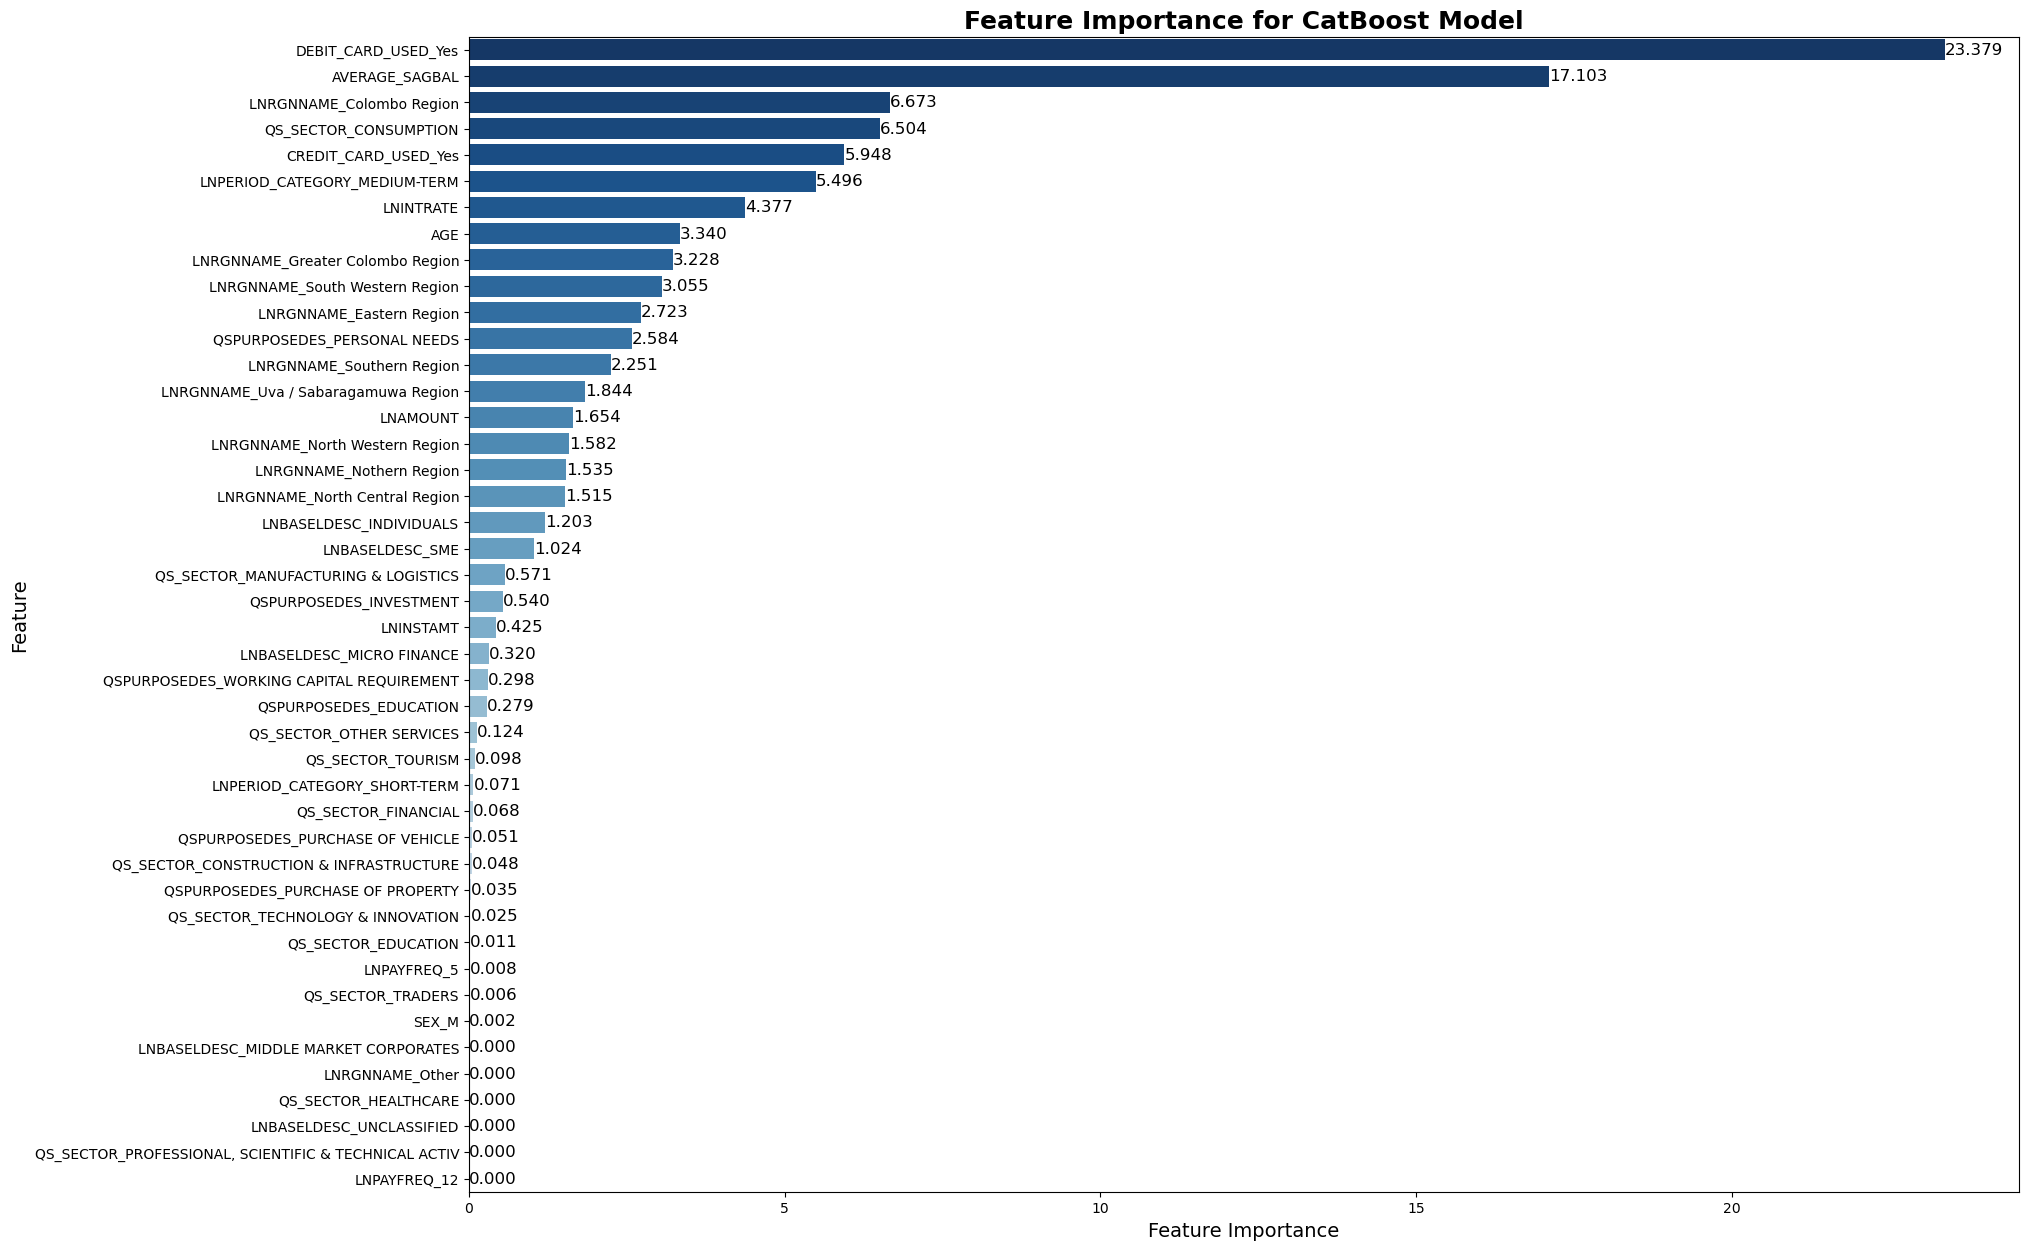

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances from the CatBoost model
feature_importances = best_catboost.feature_importances_
features = X_train_smote.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance (Descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(20,15))  # Increase figure size
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')  # Color gradient

# Add title and labels with better styling
plt.title('Feature Importance for CatBoost Model', fontsize=18, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.002, index, f'{value:.3f}', va='center', fontsize=12)

plt.show()


In [33]:
# Example of re-training with reduced features (if you decided to drop some features)
important_features = importance_df[importance_df['Importance'] >0.4]['Feature'].tolist()
X_train_reduced = X_train_smote[important_features]
X_test_reduced = X_test[important_features]

# Use the best estimator from previous GridSearchCV (no need to run GridSearchCV again)
best_catboost.fit(X_train_reduced, y_train_smote)

# Make predictions
y_pred_train_reduced = best_catboost.predict(X_train_reduced)
y_pred_test_reduced = best_catboost.predict(X_test_reduced)

# Re-evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f"Training Accuracy (reduced): {accuracy_score(y_train_smote, y_pred_train_reduced)}")
print(f"Testing Accuracy (reduced): {accuracy_score(y_test, y_pred_test_reduced)}")
print("Classification Report (reduced):\n", classification_report(y_test, y_pred_test_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))



Training Accuracy (reduced): 0.8921210540046961
Testing Accuracy (reduced): 0.8303393213572854
Classification Report (reduced):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1654
           1       0.51      0.71      0.60       350

    accuracy                           0.83      2004
   macro avg       0.72      0.78      0.74      2004
weighted avg       0.86      0.83      0.84      2004

Confusion Matrix:
 [[1412  242]
 [  96  254]]


In [44]:
import joblib
joblib.dump(best_catboost,"classification_model_personal.pkl")

['classification_model_personal.pkl']

In [45]:
joblib.dump(scaler,"c_scaler.pkl")

['c_scaler.pkl']

In [46]:
joblib.dump(list(X_train_smote.columns),"c_X_train.pkl")

['c_X_train.pkl']

In [47]:
X_train_smote.columns

Index(['LNAMOUNT', 'LNINTRATE', 'LNINSTAMT', 'AGE', 'AVERAGE_SAGBAL',
       'QSPURPOSEDES_EDUCATION', 'QSPURPOSEDES_INVESTMENT',
       'QSPURPOSEDES_PERSONAL NEEDS', 'QSPURPOSEDES_PURCHASE OF PROPERTY',
       'QSPURPOSEDES_PURCHASE OF VEHICLE',
       'QSPURPOSEDES_WORKING CAPITAL REQUIREMENT',
       'QS_SECTOR_CONSTRUCTION & INFRASTRUCTURE', 'QS_SECTOR_CONSUMPTION',
       'QS_SECTOR_EDUCATION', 'QS_SECTOR_FINANCIAL', 'QS_SECTOR_HEALTHCARE',
       'QS_SECTOR_MANUFACTURING & LOGISTICS', 'QS_SECTOR_OTHER SERVICES',
       'QS_SECTOR_PROFESSIONAL, SCIENTIFIC & TECHNICAL ACTIV',
       'QS_SECTOR_TECHNOLOGY & INNOVATION', 'QS_SECTOR_TOURISM',
       'QS_SECTOR_TRADERS', 'LNBASELDESC_INDIVIDUALS',
       'LNBASELDESC_MICRO FINANCE', 'LNBASELDESC_MIDDLE MARKET CORPORATES',
       'LNBASELDESC_SME', 'LNBASELDESC_UNCLASSIFIED', 'SEX_M', 'LNPAYFREQ_5',
       'LNPAYFREQ_12', 'CREDIT_CARD_USED_Yes', 'DEBIT_CARD_USED_Yes',
       'LNPERIOD_CATEGORY_MEDIUM-TERM', 'LNPERIOD_CATEGORY_SHORT-TER

# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Fit the model to training data
adaboost_model.fit(X_train_smote, y_train_smote)

# Make predictions on training and testing data
y_pred_train = adaboost_model.predict(X_train_smote)
y_pred_test = adaboost_model.predict(X_test)

# Evaluate model performance on training and testing data
print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Print the classification report for testing and training
print("Classification Report (Testing):")
print(classification_report(y_test, y_pred_test))

print("Classification Report (Training):")
print(classification_report(y_train_smote, y_pred_train))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.8835116097051917
Testing Accuracy: 0.8248502994011976
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1654
           1       0.50      0.62      0.55       350

    accuracy                           0.82      2004
   macro avg       0.71      0.75      0.72      2004
weighted avg       0.84      0.82      0.83      2004

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3833
           1       0.87      0.90      0.89      3833

    accuracy                           0.88      7666
   macro avg       0.88      0.88      0.88      7666
weighted avg       0.88      0.88      0.88      7666

Confusion Matrix:
[[1435  219]
 [ 132  218]]


# Hyperparameter tune

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV



# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithm
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_adaboost = grid_search.best_estimator_

# Make predictions
y_pred_train = best_adaboost.predict(X_train_smote)
y_pred_test = best_adaboost.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   1.2s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=200; total time=   2.4s
[CV] END algorithm=SAMME, learn

# Feature Importance

In [156]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Get feature importances from the best model
# feature_importances = best_adaboost.feature_importances_

# # Create a DataFrame to visualize feature importances
# # Assuming your X_train has the column names, if you have the original columns as input features
# features = X_train_smote.columns
# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Print the most important features
# print(importance_df)

# # Visualize the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance for XGBoost Model')
# plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
# plt.show()


In [53]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV



# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [300,400,500],  # Number of base estimators
#     'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
#     'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithm
# }

# # GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# # Fit the model
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Best estimator
# best_adaboost = grid_search.best_estimator_

# # Make predictions
# y_pred_train = best_adaboost.predict(X_train_smote)
# y_pred_test = best_adaboost.predict(X_test)

# # Evaluate performance
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# print(f"Training Accuracy: {accuracy_score(y_train_smote, y_pred_train)}")
# print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")
# print("Classification Report testing:\n", classification_report(y_test, y_pred_test))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
